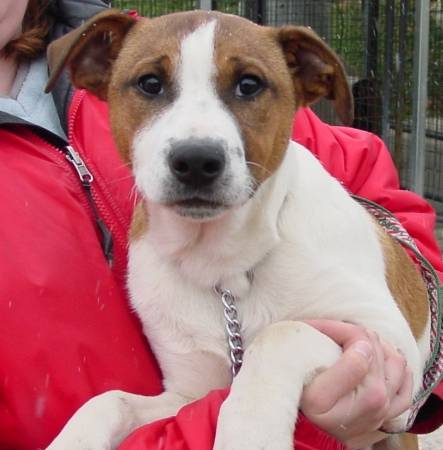

[[0.22517784 0.7748221 ]]


In [7]:
from keras.models import load_model
from google.colab.patches import cv2_imshow
from PIL import Image, ImageOps

import numpy as np
import cv2

# Load the model
model = load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.

data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
# image = Image.open('/content/IMG_20220507_160628.jpg')
image = Image.open('/content/21.jpg')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

#image read on opencv
# image = cv2.imread('/content/IMG_20220507_160628.jpg')
image = cv2.imread('/content/21.jpg')

# show the image
cv2_imshow(image)

# run the inference
prediction = model.predict(data)
print(prediction)